In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# def vector_rejection(u, v):
#     dot_products = np.dot(u, v)/np.dot(v, v)
#     projections = dot_products * v
#     return projections-u#-np.array([projections])

def vector_rejection(point, orig, norm):
    v = point - orig
    dist = np.dot(v[0, :], norm)
    return point - dist*norm.T


Find and plot orthogonal projection of vector onto a line in 2D

(-0.05, 1.05, -0.1, 2.1)

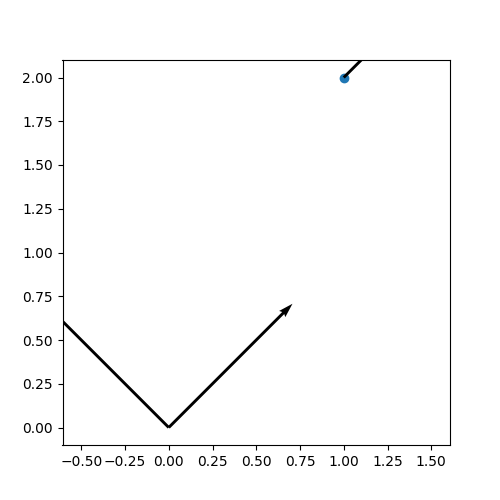

In [26]:
pt = np.array([[1, 2.0]])
v = np.array([0.5, 0.5])
unit_v = v/np.linalg.norm(v)
norm_v = np.array([-unit_v[1], unit_v[0]])

fig, ax = plt.subplots(figsize = (5, 5))


ax.quiver(0, 0, norm_v[0], norm_v[1], angles='xy', scale_units='xy', scale=1)
ax.quiver(0, 0, unit_v[0], unit_v[1],  angles='xy', scale_units='xy', scale=1)
ax.scatter(pt[0, 0], pt[0, 1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])

rejection = vector_rejection(pt, unit_v, norm_v)

ax.quiver(pt[0, 0], pt[0, 1], rejection[0, 0], rejection[0, 1], angles='xy', scale_units='xy', scale=1)
plt.axis('equal')




Now do it in 3D.

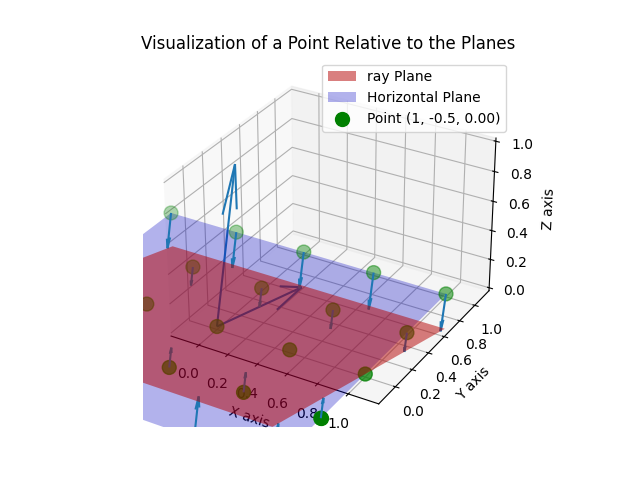

In [37]:

%matplotlib widget

# Define the plane equation parameters A, B, C, D for the ray
A, B, C, D = 0, 0.25, 1.0, 0  # Ax + By + Cz - D = 0

# Ray vector set up
point_ray = np.array([[0, 0, 0]]) # Define the location the ray hits on the detector
v_ray = np.array([[A, B, C]]) # Define it's direction vector from the plane equation above
v_mag_ray = np.sqrt(A**2 + B**2 + C**2) # Get magnitude
v_unit_ray = v_ray / np.linalg.norm(v_mag_ray) # Normalise

# Basis vectors e1 and e2
e1 = np.array([1, 0, 0])

# Calculate cross product with e1 and e2
cross_product_e1 = np.cross(v_unit_ray, e1)
v_unit_ray_norm = cross_product_e1

# Create a grid of x, y values
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)
xx, yy = np.meshgrid(x, y)

# Solve for z from the plane equation
zz = (D - A * xx - B * yy) / C

zz_zero = np.zeros_like(zz)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.axis('equal')

# Plot the ray plane
ax.plot_surface(xx, yy, zz, alpha=0.5, rstride=100, cstride=100, color='r', label='ray Plane')

# Plot the horizontal detector plane
ax.plot_surface(xx, yy, zz_zero, alpha=0.3, rstride=100, cstride=100, color='b', label='Horizontal Plane')

# Define a specific point (example point on detector)
px, py = 1, -0.5
pz = 0

# Plot the point
ax.scatter([px], [py], [pz], color='g', s=100, label=f'Point ({px}, {py}, {pz:.2f})')
point_det = np.array([[px, py, pz]])

# Plot the point
ax.scatter(xx.ravel(), yy.ravel(), zz_zero.ravel(), color='g', s=100)

points = np.vstack([xx.ravel(), yy.ravel(), zz_zero.ravel()]).T

rejection = vector_rejection(points, point_ray, v_unit_ray.T)
rejections = rejection-points

ax.quiver(0, 0, 0, v_unit_ray[0, 0], v_unit_ray[0, 1], v_unit_ray[0, 2])
ax.quiver(0, 0, 0, v_unit_ray_norm[0, 0], v_unit_ray_norm[0, 1], v_unit_ray_norm[0, 2])
ax.quiver(points[:, 0], points[:, 1], points[:, 2], rejections[:, 0], rejections[:, 1], rejections[:, 2])

# Labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Visualization of a Point Relative to the Planes')

# Legend
ax.legend()

